In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import qrcode as qr
import matplotlib
import matplotlib.pyplot as plt
import tqdm

In [2]:
img = matplotlib.image.imread("qart.small.png")
img.shape

(108, 81, 4)

In [3]:
img = img.min(axis=2)
img.shape, img

((108, 81),
 array([[0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353],
        ...,
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9882353, 0.9882353,
         0.9882353]], dtype=float32))

dtype('bool')

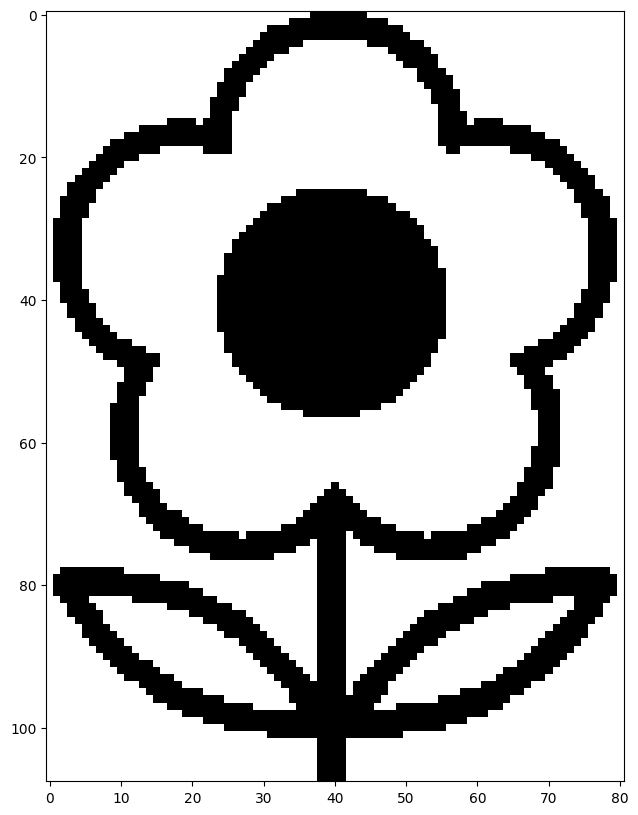

In [4]:
plt.figure(figsize=(10,10))
img = img > 0.5
plt.imshow(img, cmap="gray")
img.dtype

TypeError: Image data of dtype object cannot be converted to float

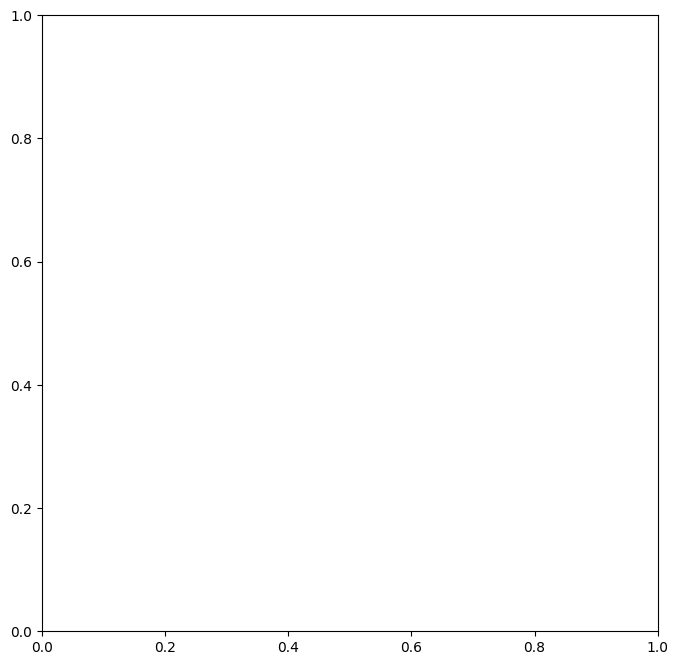

In [6]:
t = qr.make("abcdefghijklmnopqrstuvwxyz", error_correction=qr.constants.ERROR_CORRECT_L, border=0, box_size=1, version=1, mask_pattern=0)
t = np.array(t)
plt.figure(figsize=(8,8))
plt.imshow(t, cmap="gray")
t.dtype

In [ ]:
def make_qr_30(text, mask):
    # return np.full((137, 137), False)
    return np.array(qr.make(text, error_correction=qrcode.constants.ERROR_CORRECT_L, border=0, box_size=1, version=30, mask_pattern=mask))

def comp_l1(text, pos, img, mask):
    VERSION = 30
    CODE_SIZE = VERSION * 4 + 17
    cutout = make_qr_30(text, mask)[CODE_SIZE - img.shape[0] - pos[0]:CODE_SIZE - pos[0], CODE_SIZE - img.shape[1] - pos[1]:CODE_SIZE - pos[1]]
    return np.sum(cutout ^ img) / img.shape[0] / img.shape[1]

comp_l1("hello", (0, 0), img, 0), comp_l1("hello world", (0, 0), img, 0)

In [ ]:
text = "a" * 1735
low = (comp_l1(text, (0, 0), img, 0), 0, text)
high = low
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_.\-~"

img = np.full(img.shape, False)

for i in tqdm.tqdm(range(len(text))):
    print()
    for j in range(len(alphabet)):
        for k in range(1):
            low_text = low[2][0:i] + alphabet[j] + low[2][i + 1:]
            low_res = comp_l1(low_text, (0, 0), img, k)
            if low_res < low[0]:
                low = (low_res, k, low_text)
                print("low:", low)
                plt.figure(figsize=(8, 8))
                plt.imshow(make_qr_30(low[2], k), cmap="gray")
                plt.show()
            # high_text = high[2][0:i] + alphabet[j] + high[2][i + 1:]
            # high_res = comp_l1(high_text, (0, 0), img, k)
            # if high_res > high[0]:
            #     high = (high_res, k, high_text)
            #     print("high", high_res)

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(make_qr_30(low[2], 0), cmap="gray")
plt.imsave("qart-1.png", make_qr_30(low[2], 0))
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(make_qr_30(text, 0), cmap="gray")
plt.imsave("qart-2.png", make_qr_30(text, 0))
plt.show()

In [21]:

for i in range(100):
    t = qr.make("abcdefghijklmnopqrstuvwxyz", error_correction=qr.constants.ERROR_CORRECT_L, border=0, box_size=1, version=30, mask_pattern=0)
    # print(t)
# t = np.array(t)
# plt.figure(figsize=(8,8))
# plt.imshow(t, cmap="gray")